In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from anfis_ba import *

In [22]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
selected_features = ["Relative_yield_change", "Tave", "Tmax", "Tmin"]#["z", "x", "y"]

In [3]:
x = np.random.choice(1000, 1000, replace=True)
y = np.random.choice(1000, 1000, replace=True)
x_test = np.random.choice(1000, 200, replace=True)
y_test = np.random.choice(1000, 200, replace=True)
benchmark_func = lambda x,y: x + y
z = benchmark_func(x,y)
z_test = benchmark_func(x_test,y_test)
train_data = pd.DataFrame({"z" : z, "x" : x, "y" : y})
test_data = pd.DataFrame({"z" : z_test, "x" : x_test, "y" : y_test})

In [23]:
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]

IF x0 in x_10 and x1 in y_4 THEN y = x0 * 1.00 + x1 * 1.00 + -0.00
IF x0 in x_11 and x1 in y_7 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_8 and x1 in y_0 THEN y = x0 * 1.00 + x1 * 1.00 + -0.00
IF x0 in x_6 and x1 in y_1 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_2 and x1 in y_1 THEN y = x0 * 1.00 + x1 * 1.00 + -0.00
IF x0 in x_5 and x1 in y_4 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_9 and x1 in y_14 THEN y = x0 * 1.00 + x1 * 1.00 + -0.00
IF x0 in x_6 and x1 in y_10 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_3 and x1 in y_2 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_1 and x1 in y_9 THEN y = x0 * 1.00 + x1 * 1.00 + -0.00
IF x0 in x_14 and x1 in y_13 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_7 and x1 in y_5 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_5 and x1 in y_8 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_11 and x1 in y_0 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_13 and x1 in y_2 THEN y = x0 * 1.00 + x1 * 1.00 + 0.00
IF x0 in x_4

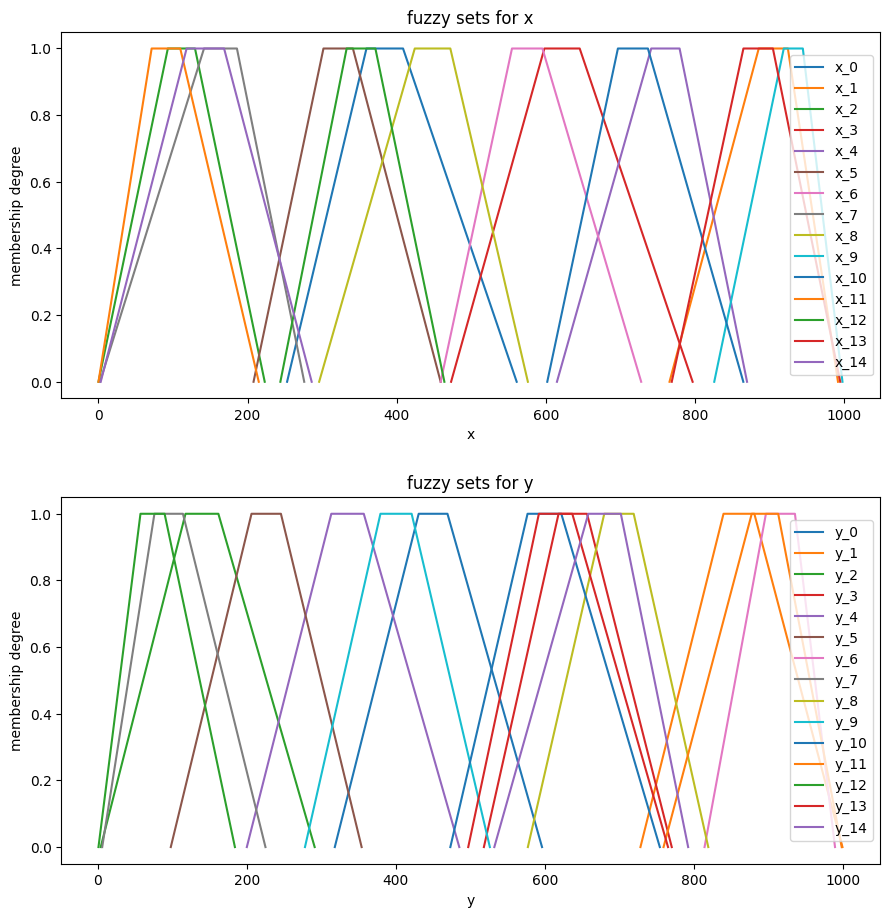

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [5]:
test_model = TSKModel()
test_model.create_rulebase_kmeans(train_data, n_rules=20, n_fuzzy_sets=15, expressions=expressions)
test_model.show_fuzzy_sets()
test_model.r2_scores

In [6]:
row = 134
cur_x = test_data.iloc[row,1:]
print("Cur x list: \n", cur_x, end="\n\n")
actual = test_model.calculate_output(cur_x.to_numpy(), activate_debug=True)
print("\nExpected:", test_data.iloc[row,0], "Actual:", actual)

Cur x list: 
 x    141
y    830
Name: 134, dtype: int32

Rule 0: 	 Firing strength: 0, Consequent value: 971.0000000000001
Rule 1: 	 Firing strength: 0.0, Consequent value: 970.9999999999998
Rule 2: 	 Firing strength: 0, Consequent value: 971.0000000000001
Rule 3: 	 Firing strength: 0.0, Consequent value: 970.9999999999997
Rule 4: 	 Firing strength: 0.8026577257289788, Consequent value: 971.0
Rule 5: 	 Firing strength: 0, Consequent value: 971.0000000000002
Rule 6: 	 Firing strength: 0, Consequent value: 971.0000000000001
Rule 7: 	 Firing strength: 0, Consequent value: 971.0000000000002
Rule 8: 	 Firing strength: 0, Consequent value: 971.0
Rule 9: 	 Firing strength: 0, Consequent value: 970.9999999999999
Rule 10: 	 Firing strength: 0, Consequent value: 971.0000000000002
Rule 11: 	 Firing strength: 0.0, Consequent value: 970.9999999999999
Rule 12: 	 Firing strength: 0, Consequent value: 971.0
Rule 13: 	 Firing strength: 0.0, Consequent value: 971.0
Rule 14: 	 Firing strength: 0, Consequ

In [7]:
test_model.test_model(test_data)

In [8]:
#print("Actual", "\t\t\t\t\tExpected")
#for i, j in test_data.iterrows():
#    cur_row = j.values
#    cur_value = test_model.calculate_output(cur_row[1:])
#    print(cur_value, f"\t\t\t{cur_row[0]}")

In [9]:
test_model.calculate_r_squared()

0.5351028062299622

In [10]:
test_model.calculate_rmse()

3756.2112560397877

In [11]:
test_model.calculate_output([3,4])

0

In [12]:
y = test_data.iloc[:, 0].to_numpy()

In [13]:
np.sum((y - np.mean(test_model.test_actuals))**2)

30348909.8

In [14]:
np.sum((y - test_model.test_actuals)**2)

14109123.0

In [15]:
test_model.rulebase.rules[1].consequent.params_list

array([1., 1.])

In [16]:
test_model.rulebase.rules[1].consequent.const

0.0

In [17]:
test_reg_data = test_model.merged_dataset[test_model.merged_dataset["Subcluster_number"] == 1]

<Axes: >

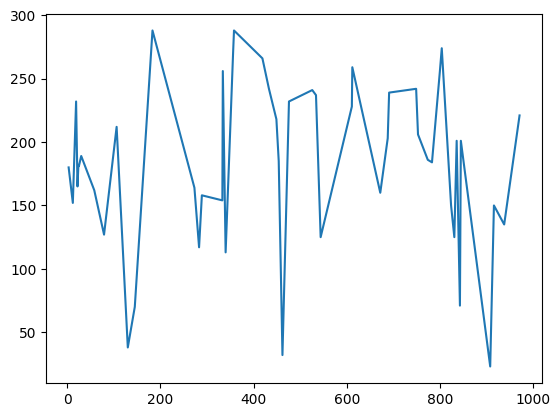

In [18]:
test_reg_data.iloc[:,0].plot()

<Axes: >

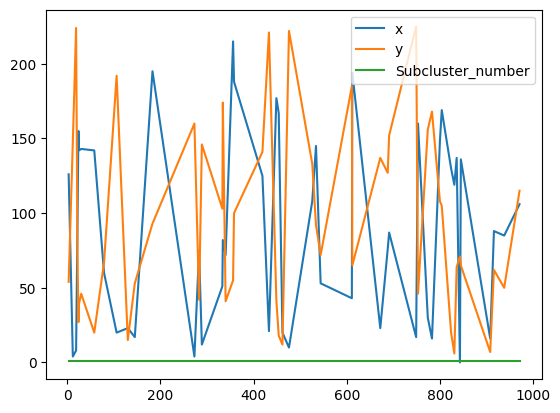

In [19]:
test_reg_data.iloc[:,1:].plot()

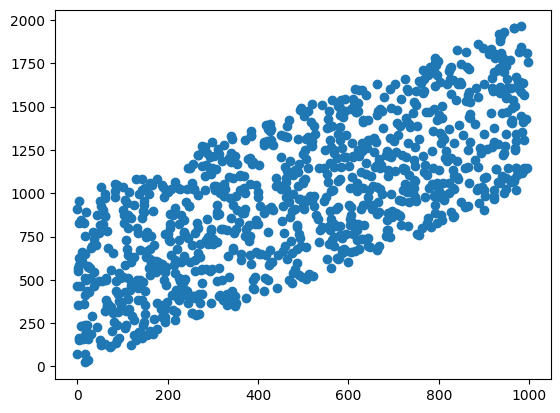

In [20]:
plt.scatter(train_data["x"], train_data["z"])